In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
sd = pd.read_csv('insurance_part2_data.csv')

In [70]:
sd.replace(to_replace = 0,value = np.nan,inplace = True)

In [27]:
sd.Commision.mode()

0    63.21
dtype: float64

In [28]:
sd.Sales.mode()

0    20.0
dtype: float64

In [29]:
sd.Duration.mode()

0    8.0
dtype: float64

In [71]:
sd['Commision']=sd['Commision'].fillna(63.21)
sd['Sales']=sd['Sales'].fillna(20.0)
sd['Duration']=sd['Duration'].fillna(8.0)

In [72]:
sd.drop (sd[sd.Duration < 0].index, inplace = True)

In [73]:
sd.drop (sd[sd.Duration == 4580].index, inplace = True)

In [19]:
sdc.Duration> 4500

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: Duration, Length: 2999, dtype: bool

In [74]:
sd.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7.0,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,63.21,Online,34.0,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3.0,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,63.21,Online,4.0,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53.0,18.00,Bronze Plan,ASIA


In [43]:
sd.shape

(2998, 10)

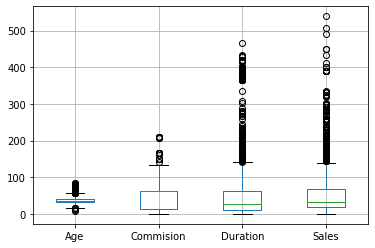

In [44]:
sd.boxplot()

In [24]:
sdc.Duration.value_counts()

8.0      83
5.0      82
10.0     81
6.0      81
11.0     81
         ..
216.0     1
392.0     1
204.0     1
190.0     1
239.0     1
Name: Duration, Length: 255, dtype: int64

In [7]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [8]:
for feature in sdc[['Age', 'Commision', 'Duration', 'Sales']]: 
    lr,ur=treat_outlier(sdc[feature])
    sdc[feature]=np.where(sdc[feature]>ur,ur,sdc[feature])
    sdc[feature]=np.where(sdc[feature]<lr,lr,sdc[feature])

In [75]:
for feature in sd.columns: 
    if sd[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(sd[feature].unique()))
        print(pd.Categorical(sd[feature].unique()).codes)
        sd[feature] = pd.Categorical(sd[feature]).codes




feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [76]:
X = sd.drop("Claimed", axis=1)

y = sd.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,63.21,1,34.0,20.00,2,0
2,39,1,1,5.94,1,3.0,9.90,2,1
3,36,2,1,63.21,1,4.0,26.00,1,0
4,33,3,0,6.30,1,53.0,18.00,0,0


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [66]:
print (X_train, X_test.shape, train_labels.shape, test_labels.shape)

      Age Agency_Code           Type  Commision Channel  Duration  Sales  \
2834   28         C2B       Airlines      20.38  Online      29.0   81.5   
1793   19         C2B       Airlines       6.00  Online      32.0   15.0   
957    36         EPX  Travel Agency      63.21  Online       2.0   20.0   
1385   25         C2B       Airlines      12.40  Online      42.0   31.0   
1307   30         CWT  Travel Agency      17.82  Online      16.0   29.7   
...   ...         ...            ...        ...     ...       ...    ...   
2764   28         C2B       Airlines      13.25  Online      21.0   53.0   
905    41         C2B       Airlines       6.00  Online       9.0   15.0   
1096   36         EPX  Travel Agency      63.21  Online     131.0   63.0   
235    44         JZI       Airlines       6.30  Online       6.0   18.0   
1061   36         C2B       Airlines       5.63  Online      85.0   22.5   

         Product Name Destination  
2834      Silver Plan        ASIA  
1793      Bronz

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [17]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 300}

In [18]:
best_grid = grid_search.best_estimator_

In [19]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

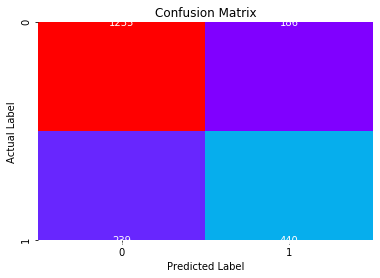

In [23]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
confusion_matrix(train_labels, ytrain_predict)

array([[1235,  186],
       [ 239,  440]], dtype=int64)

In [25]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1421
           1       0.70      0.65      0.67       679

    accuracy                           0.80      2100
   macro avg       0.77      0.76      0.76      2100
weighted avg       0.79      0.80      0.80      2100



AUC: 0.863


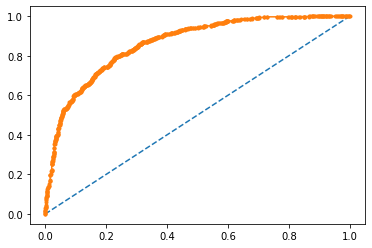

In [27]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

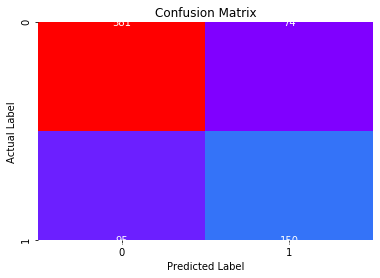

In [28]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [29]:
confusion_matrix(test_labels,ytest_predict)

array([[581,  74],
       [ 95, 150]], dtype=int64)

In [30]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       655
           1       0.67      0.61      0.64       245

    accuracy                           0.81       900
   macro avg       0.76      0.75      0.76       900
weighted avg       0.81      0.81      0.81       900



AUC: 0.823


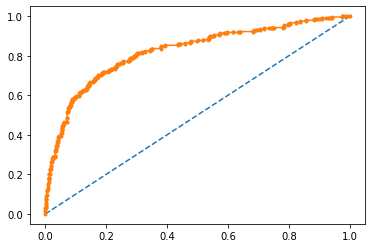

In [31]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [81]:
param_grid = {
    'hidden_layer_sizes': [100,50,200]
    'max_iter': [7000,5000,2500]
    'solver': ['adam' ,'sgd']
    'tol': [0.01], 
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

SyntaxError: invalid syntax (<ipython-input-81-b8f861b73411>, line 3)

In [50]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [79]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

In [82]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_iter=7000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.01,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [83]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [84]:
confusion_matrix(train_labels,ytrain_predict)

array([[1392,   79],
       [ 462,  165]], dtype=int64)

In [85]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7421353670162059

In [86]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1471
           1       0.68      0.26      0.38       627

    accuracy                           0.74      2098
   macro avg       0.71      0.60      0.61      2098
weighted avg       0.73      0.74      0.70      2098



In [87]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][1],2)
nn_train_recall=round(df.loc["1"][2],2)
nn_train_f1=round(df.loc["1"][0],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.26
nn_train_recall  0.38
nn_train_f1  0.68


Area under Curve is 0.6047264660631865


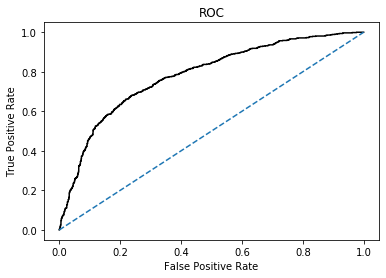

In [88]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

In [89]:
confusion_matrix(test_labels,ytest_predict)

array([[565,  38],
       [208,  89]], dtype=int64)

In [90]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7266666666666667

In [91]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82       603
           1       0.70      0.30      0.42       297

    accuracy                           0.73       900
   macro avg       0.72      0.62      0.62       900
weighted avg       0.72      0.73      0.69       900



In [92]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][1],2)
nn_test_recall=round(df.loc["1"][2],2)
nn_test_f1=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.3
nn_test_recall  0.42
nn_test_f1  0.7


Area under Curve is 0.6183225287702899


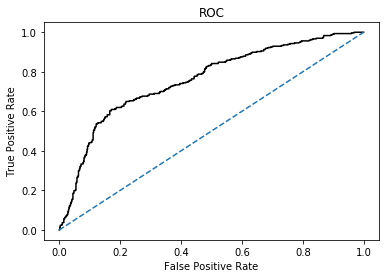

In [93]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [98]:
param_grid = {
    'max_depth': [10],
    'max_features': [6],
    'min_samples_leaf': [10],
    'min_samples_split': [50],
    'n_estimators': [300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [99]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [100]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [101]:
best_grid = grid_search.best_estimator_

In [102]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [104]:
confusion_matrix(train_labels,ytrain_predict)

array([[1347,  124],
       [ 261,  366]], dtype=int64)

In [105]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8164918970448046

In [106]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1471
           1       0.75      0.58      0.66       627

    accuracy                           0.82      2098
   macro avg       0.79      0.75      0.77      2098
weighted avg       0.81      0.82      0.81      2098



In [107]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.58
rf_train_recall  0.66
rf_train_f1  0.75


Area under Curve is 0.7497178302037153


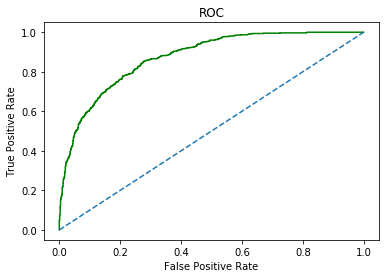

In [108]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

In [109]:
confusion_matrix(test_labels,ytest_predict)

array([[544,  59],
       [143, 154]], dtype=int64)

In [110]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7755555555555556

In [111]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       603
           1       0.72      0.52      0.60       297

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.72       900
weighted avg       0.77      0.78      0.76       900



In [112]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.52
rf_test_recall  0.6
rf_test_f1  0.72


Area under Curve is 0.7103372028745163


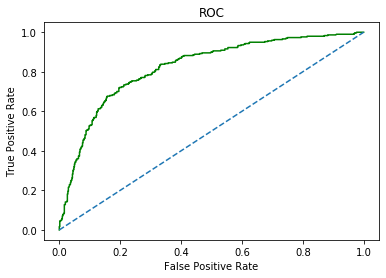

In [113]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [114]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.334551
Sales         0.202768
Product Name  0.192959
Duration      0.095084
Commision     0.076119
Age           0.067701
Type          0.021971
Destination   0.008669
Channel       0.000177


In [115]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10], #20,30,50
    'min_samples_leaf': [50], #100,150
    'min_samples_split': [450], #150,300
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [116]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=450,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [118]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.679881
Sales         0.241571
Product Name  0.066662
Duration      0.011886
Age           0.000000
Type          0.000000
Commision     0.000000
Channel       0.000000
Destination   0.000000


In [119]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [120]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.836820,0.163180
1,0.553254,0.446746
2,0.836820,0.163180
3,0.245847,0.754153
4,0.836820,0.163180


AUC: 0.806


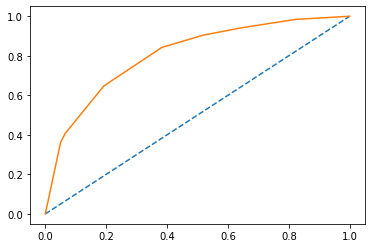

In [121]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.792


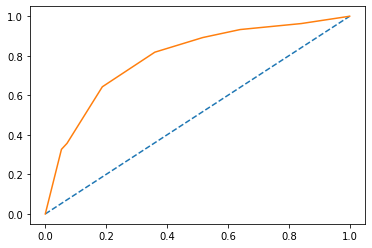

In [122]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [123]:
confusion_matrix(train_labels, ytrain_predict)

array([[1375,   96],
       [ 372,  255]], dtype=int64)

In [124]:

cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.776930409914204

In [125]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1471
           1       0.73      0.41      0.52       627

    accuracy                           0.78      2098
   macro avg       0.76      0.67      0.69      2098
weighted avg       0.77      0.78      0.76      2098



In [126]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][1],2)
cart_train_recall=round(df.loc["1"][2],2)
cart_train_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.41
cart_train_recall  0.52
cart_train_f1  0.73


In [127]:
confusion_matrix(test_labels, ytest_predict)

array([[560,  43],
       [191, 106]], dtype=int64)

In [128]:

cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.74

In [129]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       603
           1       0.71      0.36      0.48       297

    accuracy                           0.74       900
   macro avg       0.73      0.64      0.65       900
weighted avg       0.73      0.74      0.71       900



In [130]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][1],2)
cart_test_recall=round(df.loc["1"][2],2)
cart_test_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.36
cart_train_recall  0.48
cart_train_f1  0.71


In [131]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.74,0.82,0.78,0.74,0.73
AUC,0.81,0.79,0.75,0.71,0.60,0.62
Recall,0.52,0.48,0.66,0.60,0.38,0.42
Precision,0.41,0.36,0.58,0.52,0.26,0.30
F1 Score,0.73,0.71,0.75,0.72,0.68,0.70


In [ ]:
from sklearn.cluster import KMeans

In [133]:
df = pd.read_csv("bank_marketing_part1_Data.csv")

In [134]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [135]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

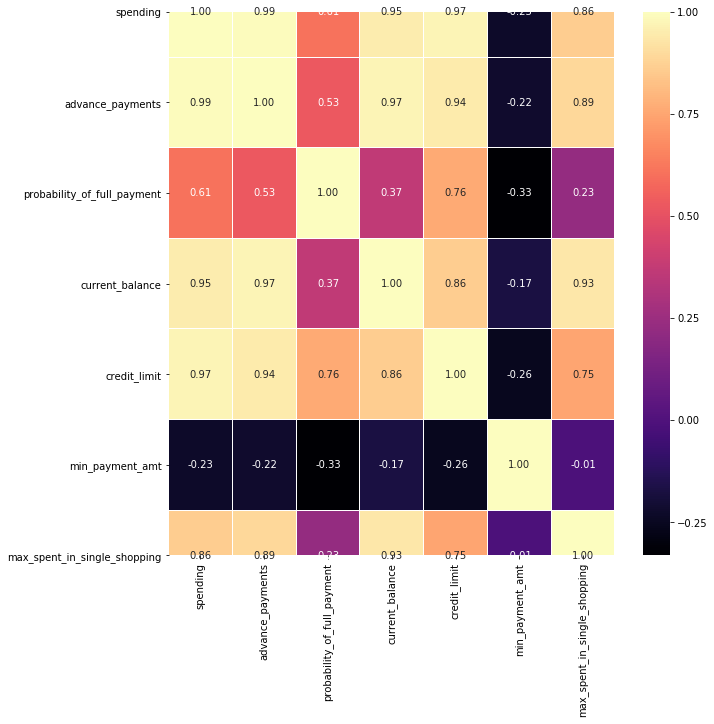

In [136]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
X = StandardScaler()

In [139]:
df_sc = X.fit_transform(df)

In [141]:
wardlink = linkage(df_sc, method = 'ward')

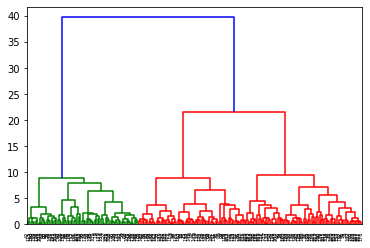

In [142]:
dend = dendrogram(wardlink)

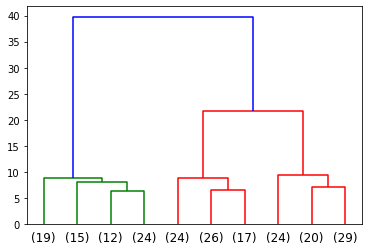

In [143]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [144]:
link_method = linkage(df_sc, method = 'average')

In [145]:
from scipy.cluster.hierarchy import fcluster

In [146]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [147]:
df['clusters'] = clusters

In [148]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [152]:
wss = []

In [153]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_sc)
    wss.append(KM.inertia_)

In [150]:
from sklearn.cluster import KMeans 

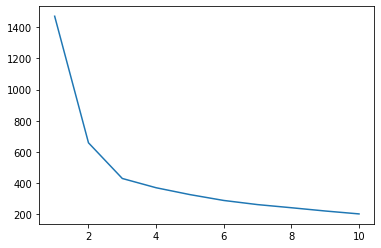

In [154]:
plt.plot(range(1,11), wss)

In [155]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_sc)
labels = k_means.labels_

In [156]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [157]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [158]:
silhouette_score(df_sc,labels)

0.4007270552751299

In [159]:
sil_width = silhouette_samples(df_sc,labels)

In [160]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.362276


In [161]:
df.Clus_kmeans.value_counts().sort_index()

0    72
1    67
2    71
Name: Clus_kmeans, dtype: int64

In [164]:
clust_profile=df
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width,freq
Clus_kmeans,,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,0.397473,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468772,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.339816,71
